      GPA  SAT_Score  Extracurricular_Activities Admission_Status
0    3.46       1223                           8         Rejected
1    2.54        974                           8         Rejected
2    2.91        909                           9         Rejected
3    2.83       1369                           5         Accepted
4    3.60       1536                           7         Accepted
..    ...        ...                         ...              ...
245  3.57       1024                           3         Rejected
246  2.86       1367                           1       Waitlisted
247  3.09       1036                           3       Waitlisted
248  3.51       1375                           5       Waitlisted
249  2.95       1583                           1       Waitlisted

[250 rows x 4 columns]


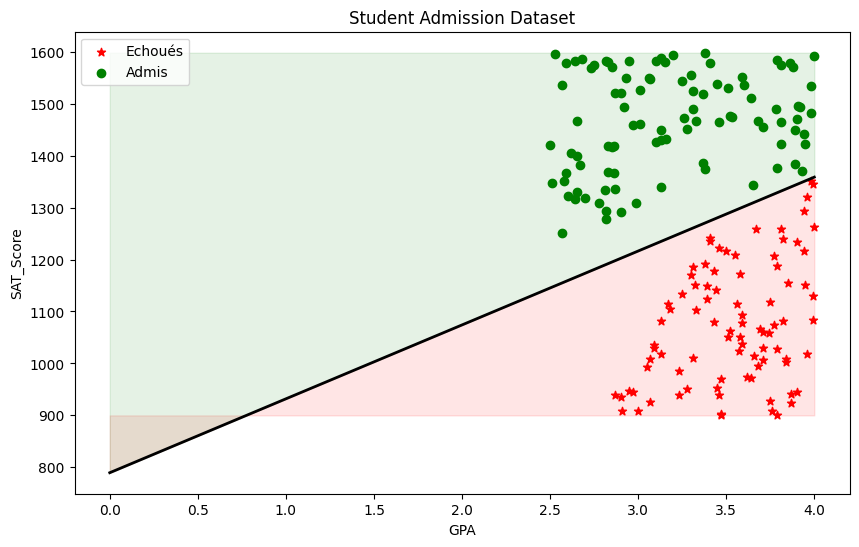

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

# Charger les données depuis un fichier CSV
data = pd.read_csv('student_admission_dataset.csv')
#visualiser les data
print(data)

# Diviser les données en caractéristiques (X) et étiquettes de classe (y)
X = data[['GPA', 'SAT_Score']].values
y = data['Admission_Status'].values

# Convertir les étiquettes de classe en valeurs numériques
le = LabelEncoder()
y = le.fit_transform(y)

# Entraîner un modèle SVM sur l'ensemble de données complet
svm_model = SVC(kernel='linear')
svm_model.fit(X, y)

# Générer des prédictions sur l'ensemble de données complet
predictions = svm_model.predict(X)

# Créer un DataFrame pour stocker les prédictions et les scores
predictions_df = pd.DataFrame(X, columns=['GPA', 'SAT_Score'])
predictions_df['Admission_Status'] = le.inverse_transform(predictions)

# Trier les prédictions par ordre croissant des scores SAT
predictions_df = predictions_df.sort_values(by='SAT_Score')

# Diviser les prédictions en étudiants admis et refusés
admitted_students = predictions_df[predictions_df['Admission_Status'] == 'Accepted']
rejected_students = predictions_df[predictions_df['Admission_Status'] == 'Rejected']

# Trouver les coefficients du modèle SVM
coef = svm_model.coef_[0]
intercept = svm_model.intercept_

# Calculer les coordonnées de la ligne diagonale entre les admis et les refusés
x_values = np.linspace(0, 4, 100)
y_values = (-coef[0] / coef[1]) * x_values - (intercept[0] / coef[1])

# Afficher les prédictions avec la diagonale
plt.figure(figsize=(10, 6))
plt.scatter(rejected_students['GPA'], rejected_students['SAT_Score'], c='red', marker='*', label='Echoués')
plt.scatter(admitted_students['GPA'], admitted_students['SAT_Score'], c='green', marker='o', label='Admis')

# Remplir les zones de couleur
plt.fill_between(x_values, y_values, np.min(predictions_df['SAT_Score']) - 0.1, color='red', alpha=0.1)
plt.fill_between(x_values, y_values, np.max(predictions_df['SAT_Score']) + 0.1, color='green', alpha=0.1)

# Tracer la diagonale
plt.plot(x_values, y_values, color='black',  linewidth=2)
plt.xlabel('GPA')
plt.ylabel('SAT_Score')
plt.title('Student Admission Dataset')
plt.legend()
plt.show()